<a href="https://colab.research.google.com/github/Arxtage/Practical-ML-DL-on-CIFAR10/blob/main/LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
!pip install lightgbm --install-option=--gpu

/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)


# CIFAR-10


In [3]:
#download
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

#unzip -f file, -x extract
!tar -xf '/content/cifar-10-python.tar.gz'

list_of_class_names = ["airplane", "automobile", "bird", "cat", "deer",	
                       "dog", "frog", "horse", "ship","truck"]

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

--2021-08-09 21:36:00--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.2’

cifar-10-python.tar 100%[===================>] 162.60M  31.6MB/s    in 5.8s    

2021-08-09 21:36:06 (28.1 MB/s) - ‘cifar-10-python.tar.gz.2’ saved [170498071/170498071]



In [4]:
# load Train and Test data

# TRAIN
first = unpickle('/content/cifar-10-batches-py/data_batch_1')
X_train = np.array(first["data"])
y_train = np.array(first["labels"])


for i in range(2,6):
    batch = unpickle('/content/cifar-10-batches-py/data_batch_{}'.format(i))
    X_train = np.concatenate([X_train, np.array(batch["data"])])
    y_train = np.concatenate([y_train, np.array(batch["labels"])])

# TEST
test = unpickle('/content/cifar-10-batches-py/test_batch')

X_test = np.array(test["data"])
y_test = np.array(test["labels"])

Text(0.5, 1.0, 'bird')

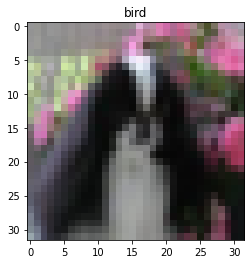

In [5]:
plt.imshow(np.transpose(X_test[42].reshape([3,32,32]), (1,2,0)))
plt.title(list_of_class_names[y_train[42]])

# LightGBM


In [6]:
import lightgbm as lgb

In [7]:
# LGB Dataset load

train_data = lgb.Dataset(X_train, label = y_train)
test_data = lgb.Dataset(X_test, label = y_test)

In [19]:
train_data.label

array([6, 9, 9, ..., 9, 1, 1])

In [10]:
param = {'num_leaves': 31, 'objective': 'multiclass', 'num_class': 10,'is_training_metric':True}
param['metric'] = ['multi_logloss','softmax']

In [13]:
gbm = lgb.train(
param,
train_data,
num_boost_round=100,
valid_sets=train_data)

[1]	training's multi_logloss: 2.23031	training's multi_logloss: 2.23031
[2]	training's multi_logloss: 2.16898	training's multi_logloss: 2.16898
[3]	training's multi_logloss: 2.11506	training's multi_logloss: 2.11506
[4]	training's multi_logloss: 2.06657	training's multi_logloss: 2.06657
[5]	training's multi_logloss: 2.02292	training's multi_logloss: 2.02292
[6]	training's multi_logloss: 1.98283	training's multi_logloss: 1.98283
[7]	training's multi_logloss: 1.9459	training's multi_logloss: 1.9459
[8]	training's multi_logloss: 1.91185	training's multi_logloss: 1.91185
[9]	training's multi_logloss: 1.87928	training's multi_logloss: 1.87928
[10]	training's multi_logloss: 1.84954	training's multi_logloss: 1.84954
[11]	training's multi_logloss: 1.82082	training's multi_logloss: 1.82082
[12]	training's multi_logloss: 1.79477	training's multi_logloss: 1.79477
[13]	training's multi_logloss: 1.76985	training's multi_logloss: 1.76985
[14]	training's multi_logloss: 1.74583	training's multi_loglos

In [14]:
gbm.save_model('lightgbm.txt')

In [34]:
y_test_gbm = gbm.predict(X_test)
y_test_classes_pred = np.argmax(y_test_pred, axis=1)

In [35]:
from sklearn import metrics

accuracy_test = metrics.accuracy_score(y_test, y_test_classes_pred)
balances_accuracy_test = metrics.balanced_accuracy_score(y_test, y_test_classes_pred) # for imbalances classes
confusion_matrix = metrics.confusion_matrix(y_test, y_test_classes_pred)
precision_test = metrics.precision_score(y_test, y_test_classes_pred, average = 'macro') # can do macro bcs classes are balanced
recall_test = metrics.recall_score(y_test, y_test_classes_pred, average= 'macro')
f1_score_test = metrics.f1_score(y_test, y_test_classes_pred, average= 'macro')

print('Test Accuracy', accuracy_test)
print('Test Balanced Accuracy', balances_accuracy_test)
print('Test Precision', precision_test)
print('Test Recall', recall_test)
print('Test F1 Score', f1_score_test)

Test Accuracy 0.5141
Test Balanced Accuracy 0.5141
Test Precision 0.5104411339468636
Test Recall 0.5141
Test F1 Score 0.51078250982946


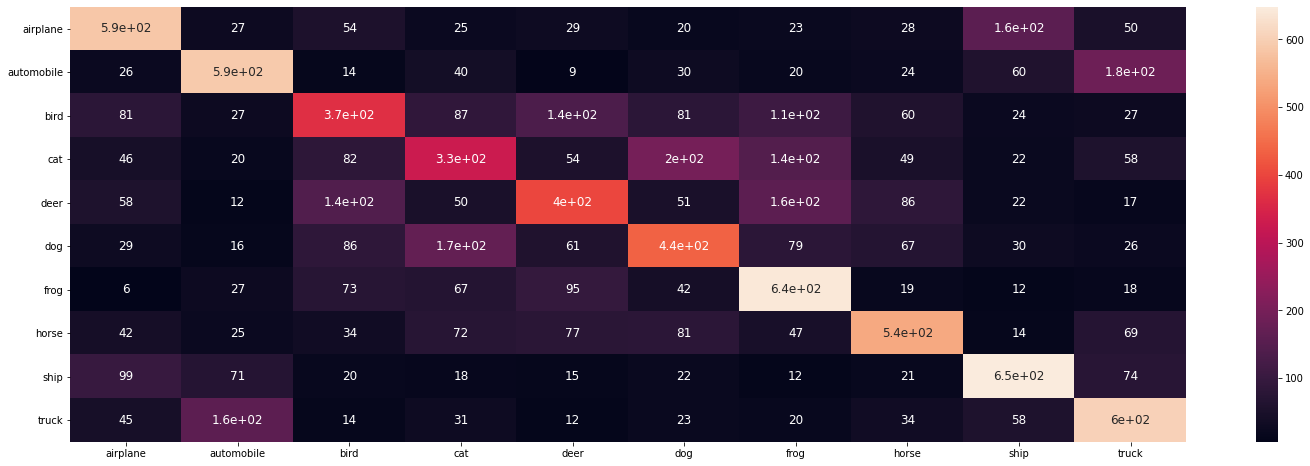

In [37]:
import seaborn as sn
import pandas as pd
plt.figure(figsize = (25,8))
df_cm = pd.DataFrame(confusion_matrix,list_of_class_names,list_of_class_names)

sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})
plt.show()